# Начало лабораторной работы №1


### Набор данных "Наблюдения НЛО в США".

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### Загрузка и сохранение данных

In [2]:
#Чтобы загрузить данные из CSV файла:

df = pd.read_csv('datasets/nuforc_reports.csv')
df.head()


summary        city state  \
0  Viewed some red lights in the sky appearing to...     Visalia    CA   
1  Look like 1 or 3 crafts from North traveling s...  Cincinnati    OH   
2  seen dark rectangle moving slowly thru the sky...      Tecopa    CA   
3  One red light moving switly west to east, beco...   Knoxville    TN   
4  Bright, circular Fresnel-lens shaped light sev...  Alexandria    VA   

             date_time      shape         duration  \
0  2021-12-15T21:45:00      light        2 minutes   
1  2021-12-16T09:45:00   triangle       14 seconds   
2  2021-12-10T00:00:00  rectangle  Several minutes   
3  2021-12-10T19:30:00   triangle    20-30 seconds   
4  2021-12-07T08:00:00     circle              NaN   

                                               stats  \
0  Occurred : 12/15/2021 21:45  (Entered as : 12/...   
1  Occurred : 12/16/2021 09:45  (Entered as : 12/...   
2  Occurred : 12/10/2021 00:00  (Entered as : 12/...   
3  Occurred : 12/10/2021 19:30  (Entered as : 12/...   
4  Occurred : 12/7/2021 08:00  (Entered as : 12/0...   

                                         report_link  \
0  http://www.nuforc.org/webreports/165/S165881.html   
1  http://www.nuforc.org/webreports/165/S165888.html   
2  http://www.nuforc.org/webreports/165/S165810.html   
3  http://www.nuforc.org/webreports/165/S165825.html   
4  http://www.nuforc.org/webreports/165/S165754.html   

                                                text               posted  \
0  Viewed some red lights in the sky appearing to...  2021-12-19T00:00:00   
1  Look like 1 or 3 crafts from North traveling s...  2021-12-19T00:00:00   
2  seen dark rectangle moving slowly thru the sky...  2021-12-19T00:00:00   
3  One red light moving switly west to east, beco...  2021-12-19T00:00:00   
4  Bright, circular Fresnel-lens shaped light sev...  2021-12-19T00:00:00   

   city_latitude  city_longitude  
0      36.356650     -119.347937  
1      39.174503      -84.481363  
2            NaN             NaN  
3      35.961561      -83.980115  
4      38.798958      -77.095133

##### Получение сведений о датафрейме с данными

In [3]:
#Получить общую информацию о датафрейме можно с помощью:
df.info()
#Для получения статистического описания числовых колонок:
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136940 entries, 0 to 136939
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   summary         136866 non-null  object 
 1   city            136558 non-null  object 
 2   state           127595 non-null  object 
 3   date_time       134272 non-null  object 
 4   shape           131018 non-null  object 
 5   duration        130448 non-null  object 
 6   stats           136940 non-null  object 
 7   report_link     136940 non-null  object 
 8   text            136902 non-null  object 
 9   posted          134272 non-null  object 
 10  city_latitude   110136 non-null  float64
 11  city_longitude  110136 non-null  float64
dtypes: float64(2), object(10)
memory usage: 12.5+ MB


city_latitude  city_longitude
count  110136.000000   110136.000000
mean       38.704608      -95.185792
std         5.752186       18.310088
min       -32.055500     -170.494000
25%        34.238375     -113.901810
50%        39.257500      -89.161450
75%        42.317739      -80.363444
max        64.845276      130.850580

##### Получение сведений о колонках датафрейма

In [4]:
#Вывести названия колонок:
print(df.columns)

#Получить уникальные значения в колонке:
unique_values = df['city'].unique()

Index(['summary', 'city', 'state', 'date_time', 'shape', 'duration', 'stats',
       'report_link', 'text', 'posted', 'city_latitude', 'city_longitude'],
      dtype='object')


##### Вывод отельных строки и столбцов из датафрейма

In [5]:

#Для вывода отдельных строк можно использовать iloc или loc:

# Вывод первой строки
first_row = df.iloc[0]

# Вывод строк с 0 по 4
first_five_rows = df.iloc[0:5]

# Вывод по метке индекса
row_by_label = df.loc[0]

# Вывод определенного столбца
specific_column = df['city']

##### Группировка и агрегация данных в датафрейме

In [6]:
#Для группировки данных можно использовать groupby:
grouped = df.groupby('city').agg({'state': 'sum'})

##### сортировка данных в датафрейме

In [7]:
#Для сортировки данных по определенной колонке:
sorted_df = df.sort_values(by='city', ascending=True)

##### удаление строк/столбцов

In [8]:
#Для удаления строк:

# Удаление строки по индексу
df = df.drop(24)

# Удаление нескольких строк
df = df.drop([1, 2, 3])


#Для удаления столбцов:

# Удаление столбца
df = df.drop("summary", axis=1)

# Удаление нескольких столбцов
df = df.drop(['shape', 'duration'], axis=1)


##### создание новых столбцов на основе данных из существующих столбцов датафрейма

In [9]:
#Создание нового столбца на основе существующих:
df['new_columnStateCity'] = df['state'] + df['city']

##### удаление строк с пустыми значениями

In [10]:
#Для удаления строк с хотя бы одним пустым значением:
df = df.dropna()

##### заполнение пустых значений на основе существующих данных

In [11]:
# Заполнение средним значением
df['city_latitude'] = df['city_latitude'].fillna(df['city_latitude'].mean())

# Заполнение фиксированным значением
df['state'] = df['state'].fillna(0)

##### Линейная диаграмма (plot)

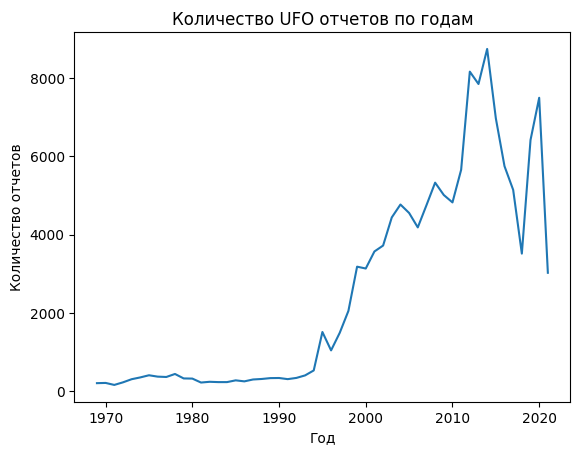

In [12]:
df = pd.read_csv('datasets/nuforc_reports.csv')

# Пример: Линейная диаграмма количества отчетов по годам
df['year'] = pd.to_datetime(df['date_time']).dt.year
yearly_counts = df['year'].value_counts().sort_index()

plt.plot(yearly_counts.index, yearly_counts.values)
plt.title('Количество UFO отчетов по годам')
plt.xlabel('Год')
plt.ylabel('Количество отчетов')
plt.show()

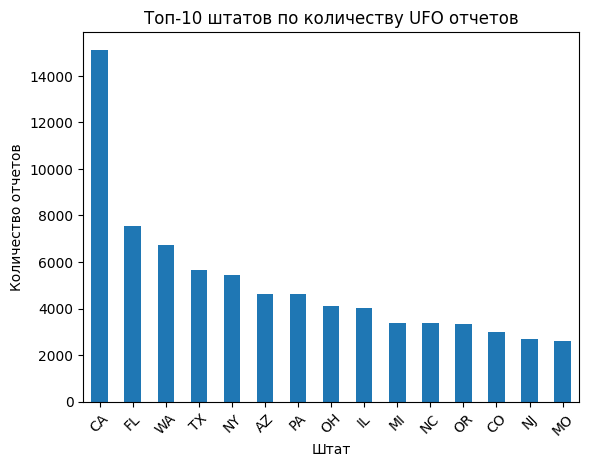

In [13]:
# Пример: Столбчатая диаграмма количества отчетов по штатам
state_counts = df['state'].value_counts().head(15)

state_counts.plot(kind='bar')
plt.title('Топ-10 штатов по количеству UFO отчетов')
plt.xlabel('Штат')
plt.ylabel('Количество отчетов')
plt.xticks(rotation=45)
plt.show()

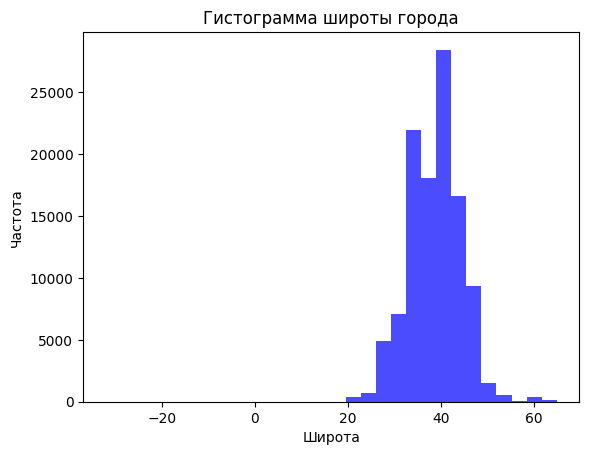

In [14]:

# Гистограмма распределения географической широты
plt.hist(df['city_latitude'].dropna(), bins=30, color='blue', alpha=0.7)
plt.title('Гистограмма широты города')
plt.xlabel('Широта')
plt.ylabel('Частота')
plt.show()


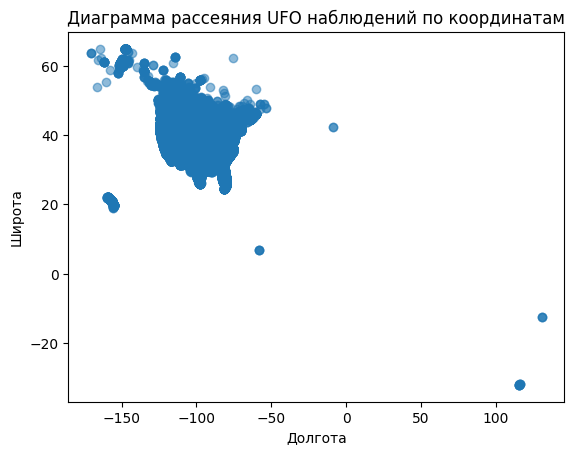

In [15]:
# Пример: Диаграмма рассеяния по координатам географической широты
plt.scatter(df['city_longitude'].dropna(), df['city_latitude'].dropna(), alpha=0.5)
plt.title('Диаграмма рассеяния UFO наблюдений по координатам')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.show()